### PYTORCH WALKTHROUGH 

#### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### This notebook gives a detailed walkthrough of how Pytorch is optimised to work with Neural networks

#### CONTENTS - 

#### > How gradients work

#### > Backpropogation

#### > Updating weights and biases - Understanding how weights and biases work

#### > Transfer Learning

#### > How LSTM networks work, and a code along of LSTM networks from scratch

#### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [1]:
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import numpy as np

#### HOW BACKPROPAGATION WORKS IN PYTORCH

In [134]:
b=torch.tensor([1],dtype=torch.float) # Needs to be floating points

In [142]:
b.requires_grad=True # Setting gradients to True

In [143]:
c=torch.tensor([3.0],requires_grad=True )

In [144]:
b,c

(tensor([1.], requires_grad=True), tensor([3.], requires_grad=True))

In [145]:
fun=b*b*c*c # We define a function to understand how backprop works, here we just square both the tensors

In [146]:
fun.backward() # Calling backprop on the function would activate the backprop following the graphs that are defined

In [147]:
b.grad.data # Returning gradients with respect to b from the function which is d(fun)/db = 2 * b * (c^2), 2 x 1 x 3 x 3

tensor([18.])

In [148]:
c.grad.data # Returning gradients with respect to c from the function which is d(fun)/dc = 2 *c * (b^2), 2 x 3 x 1 x 1

tensor([6.])

In [197]:
x=[1,2,3,4,5,6,7,8,9,10]

In [198]:
x_tensor=torch.tensor(x, dtype=torch.float)

In [199]:
x=x_tensor

In [200]:
x

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

#### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### LINEAR LAYER PYTORCH


#### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [486]:
class LinearLayer(nn.Module):
    def __init__(self,inf=10,out=1):
        super().__init__()
        self.l1=nn.Linear(inf,8)
        self.l2=nn.Linear(8,5)
        self.l3=nn.Linear(5,out)
        
    def forward(self, x):
        x=self.l1(x)
        a1=x
        x=self.l2(x)
        a2=x
        x=self.l3(x)
        a3=x
        return (a1,a2,x)
    def ME():
        print("blah")
        

 ### HOW LINEAR LAYERS ARE TRANSFORMED
 (10, ) >>> (10 * w) + b
 
 here w would be (8,10) >> The matrix multiplication here would reduce 10 to 8 vectors

In [617]:
x=torch.tensor([[1,2,3,4,5,6,7,8,9,0],[1.2,2.2,3.2,4.5,5.3,6.1,7.4,8.7,9.2,0]],dtype=torch.float)

In [585]:
x=torch.tensor([1,2,3,4,5,6,7,8,9,0],dtype=torch.float)

In [618]:
x.detach().numpy().shape

(2, 10)

In [619]:
y=torch.tensor([1.0])

In [620]:
x,y

(tensor([[1.0000, 2.0000, 3.0000, 4.0000, 5.0000, 6.0000, 7.0000, 8.0000, 9.0000,
          0.0000],
         [1.2000, 2.2000, 3.2000, 4.5000, 5.3000, 6.1000, 7.4000, 8.7000, 9.2000,
          0.0000]]), tensor([1.]))

In [621]:
print(LinearLayer())

LinearLayer(
  (l1): Linear(in_features=10, out_features=8, bias=True)
  (l2): Linear(in_features=8, out_features=5, bias=True)
  (l3): Linear(in_features=5, out_features=1, bias=True)
)


In [622]:
model=LinearLayer(10,1)
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = nn.MSELoss()

In [623]:
print(model)

LinearLayer(
  (l1): Linear(in_features=10, out_features=8, bias=True)
  (l2): Linear(in_features=8, out_features=5, bias=True)
  (l3): Linear(in_features=5, out_features=1, bias=True)
)


In [624]:
# model.state_dict()   USE THIS TO PRINT THE WEIGHTS OF THE MODEL

In [625]:
for name, param in model.named_parameters(): ## THIS GIVES YOU MORE CONTROL TO GO THROUGH THE DIFFERENT LAYERS OF THE MODEL
    if param.requires_grad:
        print(name, param.data)

l1.weight tensor([[-0.1590,  0.0269, -0.2354, -0.1072, -0.1495,  0.2848, -0.2061, -0.0903,
         -0.2066,  0.2362],
        [-0.2145, -0.2897,  0.2647,  0.1450,  0.1279,  0.1317, -0.3026,  0.1616,
          0.1270,  0.1678],
        [-0.0529,  0.2086, -0.1068, -0.2941, -0.2473, -0.1342, -0.3110,  0.1620,
         -0.1596, -0.2796],
        [ 0.1335,  0.2493, -0.0863, -0.2812,  0.1717, -0.2497,  0.0334, -0.0253,
          0.0067, -0.2920],
        [ 0.0396, -0.0523, -0.0369,  0.2008,  0.1034, -0.1296,  0.0237, -0.1732,
         -0.1093,  0.1850],
        [ 0.2422,  0.1081, -0.1293, -0.1550,  0.0212,  0.1534, -0.1169, -0.2945,
          0.1343,  0.3005],
        [ 0.2403, -0.1440, -0.1756, -0.2973, -0.1323, -0.1886,  0.0088,  0.1853,
          0.1196,  0.1690],
        [ 0.0065, -0.2249,  0.0497, -0.2498,  0.2149, -0.0602,  0.1558, -0.1733,
         -0.1929, -0.0719]])
l1.bias tensor([ 0.1708, -0.0874,  0.2996,  0.2406,  0.0040, -0.0854, -0.2254,  0.2347])
l2.weight tensor([[-0.1726, 

In [626]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

l1.weight tensor([[-0.1590,  0.0269, -0.2354, -0.1072, -0.1495,  0.2848, -0.2061, -0.0903,
         -0.2066,  0.2362],
        [-0.2145, -0.2897,  0.2647,  0.1450,  0.1279,  0.1317, -0.3026,  0.1616,
          0.1270,  0.1678],
        [-0.0529,  0.2086, -0.1068, -0.2941, -0.2473, -0.1342, -0.3110,  0.1620,
         -0.1596, -0.2796],
        [ 0.1335,  0.2493, -0.0863, -0.2812,  0.1717, -0.2497,  0.0334, -0.0253,
          0.0067, -0.2920],
        [ 0.0396, -0.0523, -0.0369,  0.2008,  0.1034, -0.1296,  0.0237, -0.1732,
         -0.1093,  0.1850],
        [ 0.2422,  0.1081, -0.1293, -0.1550,  0.0212,  0.1534, -0.1169, -0.2945,
          0.1343,  0.3005],
        [ 0.2403, -0.1440, -0.1756, -0.2973, -0.1323, -0.1886,  0.0088,  0.1853,
          0.1196,  0.1690],
        [ 0.0065, -0.2249,  0.0497, -0.2498,  0.2149, -0.0602,  0.1558, -0.1733,
         -0.1929, -0.0719]])
l1.bias tensor([ 0.1708, -0.0874,  0.2996,  0.2406,  0.0040, -0.0854, -0.2254,  0.2347])
l2.weight tensor([[-0.1726, 

### Printing y and y-predicted

In [627]:
y1,y

(tensor([-0.2270], grad_fn=<AddBackward0>), tensor([1.]))

In [628]:
losses=[]

### TRAINING - HOW IT WORKS

In [629]:
weights, bias, y1=model.forward(x)

In [630]:
y1

tensor([[0.0560],
        [0.0476]], grad_fn=<AddmmBackward>)

In [631]:
loss=criterion(y1,y)

In [632]:
losses.append(loss)

In [633]:
optimizer.zero_grad()

In [634]:
loss.backward()

In [635]:
optimizer.step()

In [636]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

l1.weight tensor([[-0.1590,  0.0269, -0.2354, -0.1074, -0.1496,  0.2847, -0.2063, -0.0906,
         -0.2068,  0.2362],
        [-0.2144, -0.2896,  0.2649,  0.1453,  0.1283,  0.1321, -0.3022,  0.1622,
          0.1276,  0.1678],
        [-0.0527,  0.2090, -0.1062, -0.2933, -0.2464, -0.1331, -0.3097,  0.1635,
         -0.1580, -0.2796],
        [ 0.1330,  0.2483, -0.0878, -0.2832,  0.1693, -0.2525,  0.0300, -0.0292,
          0.0024, -0.2920],
        [ 0.0395, -0.0525, -0.0372,  0.2005,  0.1030, -0.1302,  0.0231, -0.1740,
         -0.1101,  0.1850],
        [ 0.2422,  0.1081, -0.1293, -0.1549,  0.0212,  0.1534, -0.1169, -0.2944,
          0.1343,  0.3005],
        [ 0.2406, -0.1435, -0.1749, -0.2963, -0.1311, -0.1872,  0.0104,  0.1872,
          0.1217,  0.1690],
        [ 0.0064, -0.2250,  0.0497, -0.2499,  0.2148, -0.0603,  0.1557, -0.1735,
         -0.1931, -0.0719]])
l1.bias tensor([ 0.1708, -0.0873,  0.2997,  0.2402,  0.0039, -0.0854, -0.2251,  0.2347])
l2.weight tensor([[-0.1725, 

In [637]:
losses

[tensor(0.8992, grad_fn=<MseLossBackward>)]

### NOTE - REREUN FROM "HOW IT WORKS" to understand how the loss is reduced

In [649]:
# Below is the math that happens within the network namely, >>>>>       X(weights) + bias

#### Below is an illustration of how the weights and bias are being randomly assigned and then multiplies to get the next layer inputs

In [638]:
w=model.l1.weight.detach().numpy()
b=model.l1.bias.detach().numpy()   

In [639]:
x1=x.detach().numpy()

In [640]:
x1.shape

(2, 10)

In [641]:
w.T.shape

(10, 8)

In [642]:
w.shape

(8, 10)

In [643]:
b.shape 

(8,)

In [644]:
c=x1@w.T

In [645]:
c.shape

(2, 8)

In [646]:
final=c+b

In [647]:
final.shape, final # This is then passed on to the next Linear layer

((2, 8), array([[-4.140246 ,  2.2592165, -5.139894 , -1.1961948, -1.8587415,
         -1.5724472, -1.0939271, -2.3830237],
        [-4.471124 ,  2.3539002, -5.404824 , -1.2614663, -1.8852552,
         -1.8099957, -1.1560991, -2.5811229]], dtype=float32))

In [648]:
weights, bias

(tensor([[-4.1323,  2.2404, -5.1924, -1.0584, -1.8325, -1.5741, -1.1621, -2.3768],
         [-4.4627,  2.3341, -5.4602, -1.1161, -1.8576, -1.8117, -1.2280, -2.5745]],
        grad_fn=<AddmmBackward>),
 tensor([[-0.0792, -0.8937, -1.9372,  1.6080,  0.4814],
         [-0.0553, -0.9652, -2.0347,  1.6537,  0.5987]],
        grad_fn=<AddmmBackward>))

#### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### - CREATING A NN AND INITIALISING IT WITH PYTORCH

#### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [261]:
class Neurons(nn.Module):
    def __init__(self, input=10, output=10):
        super().__init__()
        self.h1=nn.Linear(input, 100)
        self.h2=nn.Linear(100, 60)
        self.h3=nn.Linear(60, 30)
        self.h4=nn.Linear(30, 100)
        self.h5=nn.Linear(100, output)
        
    def forward(self,x):
        #print(1)

        d1=self.h1(x)
        #print(d1)
        d1=F.relu(d1)
        d1=self.h2(d1)
        d1=F.relu(d1)
        d1=self.h3(d1)
        d1=F.relu(d1)
        
        d1=self.h4(d1)
        d1=F.relu(d1)
        d1=self.h5(d1)
        d1=F.relu(d1)
        return d1
        
        

In [262]:
model=Neurons() # Initialise the first model

In [263]:
model.h1.bias

Parameter containing:
tensor([ 0.2231, -0.0348,  0.2003,  0.1184,  0.2108,  0.2239, -0.0561,  0.3109,
         0.0242, -0.2172,  0.2232,  0.2520, -0.1565,  0.1643,  0.1050, -0.2616,
        -0.0570, -0.0071,  0.2753, -0.2957, -0.1204,  0.1113,  0.0351, -0.3000,
         0.2495,  0.2979,  0.0491, -0.2429,  0.2223,  0.1078, -0.2837,  0.0137,
        -0.2145,  0.2849,  0.2417,  0.0477, -0.1328,  0.1121,  0.0869,  0.0875,
         0.2832, -0.1376, -0.1687, -0.0207,  0.1456,  0.0208,  0.0680,  0.1845,
        -0.0351, -0.2714, -0.1518,  0.1749,  0.0343,  0.1822,  0.0343,  0.0611,
         0.1719,  0.2213,  0.0133,  0.0790,  0.2631, -0.0427,  0.1955, -0.0247,
         0.2563, -0.1840, -0.0799,  0.0433, -0.2404, -0.2094,  0.2535, -0.2482,
         0.2470,  0.2593, -0.2188, -0.1769, -0.1553, -0.0106, -0.0489, -0.2772,
        -0.0367,  0.1325, -0.0630,  0.1192,  0.1458, -0.2740,  0.2994, -0.1344,
         0.2110,  0.2025, -0.0166,  0.1336, -0.3099, -0.0862, -0.1922, -0.2914,
        -0.0987, -

In [131]:
#model.state_dict()["h1.weight"]   

In [264]:
criterion=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [265]:
epochs=10
model.train()
for t in range(epochs):
    y_pred=model(x)
    loss=criterion(y_pred,x)
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

In [273]:
model.state_dict()["h1.bias"]   ## Trained model layer bias

tensor([ 0.2231, -0.0348,  0.2104,  0.1241,  0.2108,  0.2146, -0.0466,  0.3109,
         0.0242, -0.2172,  0.2232,  0.2520, -0.1466,  0.1732,  0.1050, -0.2616,
        -0.0570,  0.0028,  0.2854, -0.2857, -0.1204,  0.1015,  0.0351, -0.3000,
         0.2495,  0.3076,  0.0491, -0.2429,  0.2257,  0.1118, -0.2837,  0.0137,
        -0.2145,  0.2791,  0.2317,  0.0477, -0.1328,  0.1121,  0.0869,  0.0875,
         0.2932, -0.1400, -0.1687, -0.0207,  0.1356,  0.0302,  0.0696,  0.1845,
        -0.0351, -0.2615, -0.1518,  0.1815,  0.0343,  0.1822,  0.0343,  0.0694,
         0.1719,  0.2213,  0.0133,  0.0790,  0.2631, -0.0478,  0.1955, -0.0247,
         0.2563, -0.1840, -0.0700,  0.0525, -0.2404, -0.1999,  0.2607, -0.2482,
         0.2470,  0.2690, -0.2088, -0.1769, -0.1578, -0.0106, -0.0489, -0.2772,
        -0.0268,  0.1332, -0.0701,  0.1192,  0.1458, -0.2740,  0.3094, -0.1381,
         0.2016,  0.2025, -0.0166,  0.1436, -0.3099, -0.0862, -0.1922, -0.2914,
        -0.0987, -0.1374, -0.1393, -0.31

In [135]:
#model.h1.bias

In [136]:
# model.train()
# output=model(x)

In [137]:
#model.state_dict()["h1.bias"]   

### ONE WAY OF ADDING A NEW LAYER AND PASSING THE OUTPUT OF EXISTING LAYER THROUGH THAT

In [267]:
#model=Neurons()
model.h6=nn.Linear(10, 2)
# Adding a new layer

In [269]:
result1=model(x)

In [271]:
result2 = model.h6(result1)

In [272]:
result2

tensor([0.5428, 0.4524], grad_fn=<AddBackward0>)

In [29]:
# Update a layer to trainable

model.h6.trainable=True

In [274]:
model.state_dict() # Printing state of the model gives all weights and biases

OrderedDict([('h1.weight',
              tensor([[-1.5180e-02,  2.5245e-01, -2.5572e-01,  2.9487e-01, -3.0550e-01,
                       -8.8485e-02, -2.4777e-01, -2.6725e-01, -1.0807e-01, -2.3417e-01],
                      [-2.7279e-01,  2.5990e-01,  3.5231e-02, -2.8507e-01,  2.3367e-01,
                       -1.5646e-01, -2.9878e-01,  1.6895e-01, -2.9058e-01, -1.6546e-01],
                      [ 2.2926e-01,  1.0390e-01, -2.4138e-01,  2.7180e-01,  3.1759e-01,
                       -2.9439e-01,  8.3949e-02,  2.4511e-01, -2.4300e-01, -6.1017e-02],
                      [ 1.7614e-01,  7.2212e-04,  1.4329e-01, -1.6625e-01,  1.5629e-01,
                       -9.8712e-02, -2.4785e-01,  2.5231e-01,  2.9543e-01, -1.6072e-01],
                      [-1.2759e-03,  8.3236e-02, -2.2241e-01, -5.6307e-02, -2.3656e-01,
                        2.3283e-01,  2.1385e-01,  6.2890e-02, -2.6357e-01, -2.3411e-01],
                      [-2.5424e-01,  1.5495e-01,  2.2749e-01,  2.6472e-01, -1.9484e-01,


### Defining a new class which inherits from the redefined class so that we can make the model changes

In [207]:
class NewNeurons(Neurons):
    def __init__(self, input=10, output=10):
        super().__init__()
        self.h6=nn.Linear(10, 2)
        
    def forward(self,x):
        d1=self.h6(x)
        d1=F.relu(d1)
        return d1
        
    

In [59]:
#Neurons().state_dict()

In [276]:
newmodel=NewNeurons() # Initialising the new model Note - This would reinitialise all the weights, so trained weights are now gone

In [213]:
## Updating a new dictionary with weights from the previous model

Preexisting_weights={y:y1 for y,y1 in model.state_dict().items() for x in newmodel.state_dict() if y in x}
 

In [214]:
## Updating the trained weights on the new model

In [215]:
newmodel.state_dict().update(Preexisting_weights)

In [220]:
newmodel.load_state_dict(newmodel.state_dict()) ## Loading the model with the new weights

<All keys matched successfully>

In [216]:
#model.load_state_dict(Neurons().state_dict())

In [221]:
newmodel.h1.bias

Parameter containing:
tensor([ 0.2175,  0.3036, -0.2440, -0.0438,  0.0803,  0.1276, -0.0502, -0.0510,
        -0.1159,  0.2665, -0.0965, -0.0029, -0.2285, -0.2251, -0.1008,  0.2778,
         0.2251,  0.1351,  0.0086,  0.0543,  0.1704, -0.2137, -0.1250, -0.1156,
        -0.2806, -0.0346,  0.0912,  0.3104,  0.0964,  0.2403,  0.2804, -0.0950,
        -0.1712,  0.1268,  0.1890,  0.2727, -0.0435, -0.2247,  0.0929, -0.2586,
         0.0977,  0.1601, -0.1972,  0.3103, -0.2654,  0.3153, -0.1758,  0.1407,
        -0.0195, -0.0915, -0.0524, -0.0188,  0.1226,  0.2547,  0.2881, -0.2041,
        -0.1706,  0.0141, -0.1042, -0.0599,  0.2422, -0.2338,  0.0639,  0.0304,
         0.1261,  0.1121,  0.1786,  0.2995,  0.2519,  0.0412,  0.1612,  0.0468,
        -0.0006,  0.1920, -0.1211,  0.1851, -0.1400, -0.0859,  0.0470, -0.0245,
         0.1238,  0.0621, -0.1860,  0.2299,  0.1876, -0.2029,  0.0848,  0.1373,
        -0.1667, -0.0077,  0.1574, -0.0632, -0.1712, -0.0699, -0.2134,  0.1254,
        -0.2940,  

In [225]:
model.train()
output=newmodel(x)

In [227]:
output, output.shape

(tensor([0.0000, 2.6715], grad_fn=<ReluBackward0>), torch.Size([2]))

### - - - Ending of Transfer Learning Concept

#### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### LSTM

#### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [285]:

class MakeLstm(nn.Module):
    def __init__(self, in_size):
            super().__init__()
            
            self.l1=nn.Linear(in_size, 30) # Linear layer takes the input and transforms it to a layer of 30
            self.l2=nn.LSTM(10,20,1) # LSTM layer is defined with 30 inputs, 20 hidden states and 1 layer
            
            self.h0=torch.rand(1,3,20) # Hidden state and Cell state are randomly initialised 
            self.c0=torch.rand(1,3,20) # layers 1, batch 1 and size = Hidden size
            
        
            
    def forward(self,x):
        x=self.l1(x)
        
        hidden = (self.h0,self.c0) # Hidden state and cell state is made into a tuple
        #print(hidden)
        
        # 30 >>> (sequence, batch, input size) if Batch_first = True, then ( batch, sequence, input size )
        output, hidden=self.l2(x.view(1,3,-1), hidden) 
        # This is then passed onto the LSTM, and the input is reshaped to seq, batch, size
        
        return output
            
    

In [286]:
torch.rand(1,1,20)

tensor([[[0.0984, 0.0589, 0.4417, 0.7920, 0.6834, 0.5416, 0.9683, 0.8136,
          0.8037, 0.4503, 0.4698, 0.9641, 0.5721, 0.3132, 0.0112, 0.4335,
          0.9738, 0.6239, 0.6296, 0.2141]]])

In [287]:
x=torch.tensor([1,2,3,4,5,6,7,8,9,0], dtype=torch.float)
model=MakeLstm(10)


In [288]:
val=model(x)
print(val)

tensor([[[ 0.3894, -0.0310,  0.0396,  0.3809, -0.0033,  0.4219,  0.0254,
           0.0443, -0.0196,  0.1054, -0.4776,  0.1188,  0.2959,  0.2520,
           0.0241,  0.4157,  0.1325,  0.1381,  0.1242,  0.0366],
         [ 0.5290, -0.0246,  0.1146,  0.0312,  0.1400,  0.0630,  0.3208,
          -0.0201, -0.0504,  0.1075, -0.0034,  0.0935,  0.4123,  0.1544,
           0.1368, -0.0056,  0.3053,  0.2055,  0.1739,  0.2777],
         [ 0.0888,  0.1719,  0.1926,  0.2167,  0.2437,  0.1748,  0.3179,
           0.1615,  0.1757,  0.3247,  0.3051,  0.4971,  0.2429,  0.0441,
           0.2293,  0.0188,  0.1197,  0.4586,  0.0830, -0.1930]]],
       grad_fn=<StackBackward>)


In [289]:
val.detach().numpy()[0].dtype

dtype('float32')

In [304]:
val.detach().numpy()[0].flatten()

array([ 0.38943672, -0.03100339,  0.03964118,  0.38088694, -0.00326936,
        0.42190745,  0.025356  ,  0.04434595, -0.01963208,  0.10543466,
       -0.47763485,  0.1187842 ,  0.29587764,  0.2519869 ,  0.02408553,
        0.41573438,  0.13251492,  0.13806367,  0.12423478,  0.03661866,
        0.52899027, -0.0246177 ,  0.11459512,  0.03122801,  0.1400379 ,
        0.0630275 ,  0.32083035, -0.02014687, -0.05043667,  0.10747094,
       -0.00337499,  0.09347769,  0.41232184,  0.15441391,  0.13682146,
       -0.00560327,  0.30529022,  0.20554464,  0.17388763,  0.27769223,
        0.08881152,  0.17185485,  0.19260435,  0.2166707 ,  0.24366884,
        0.17476894,  0.3178685 ,  0.16154858,  0.17573701,  0.32473323,
        0.3051032 ,  0.49709785,  0.24290505,  0.04410435,  0.2293206 ,
        0.01884477,  0.11967836,  0.45861432,  0.08298797, -0.19298652],
      dtype=float32)

In [312]:
labels=np.array([1], dtype=np.long)
labels=torch.tensor(labels,dtype=torch.long)
labels

tensor([1])

In [313]:
lr=0.005
clip=5
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
loss = criterion(val.view(1,-1), labels)
loss.backward()
nn.utils.clip_grad_norm_(model.parameters(), clip)
optimizer.step()

In [327]:
for c in model.state_dict():
    print(c) # Parameters of model

l1.weight
l1.bias
l2.weight_ih_l0
l2.weight_hh_l0
l2.bias_ih_l0
l2.bias_hh_l0


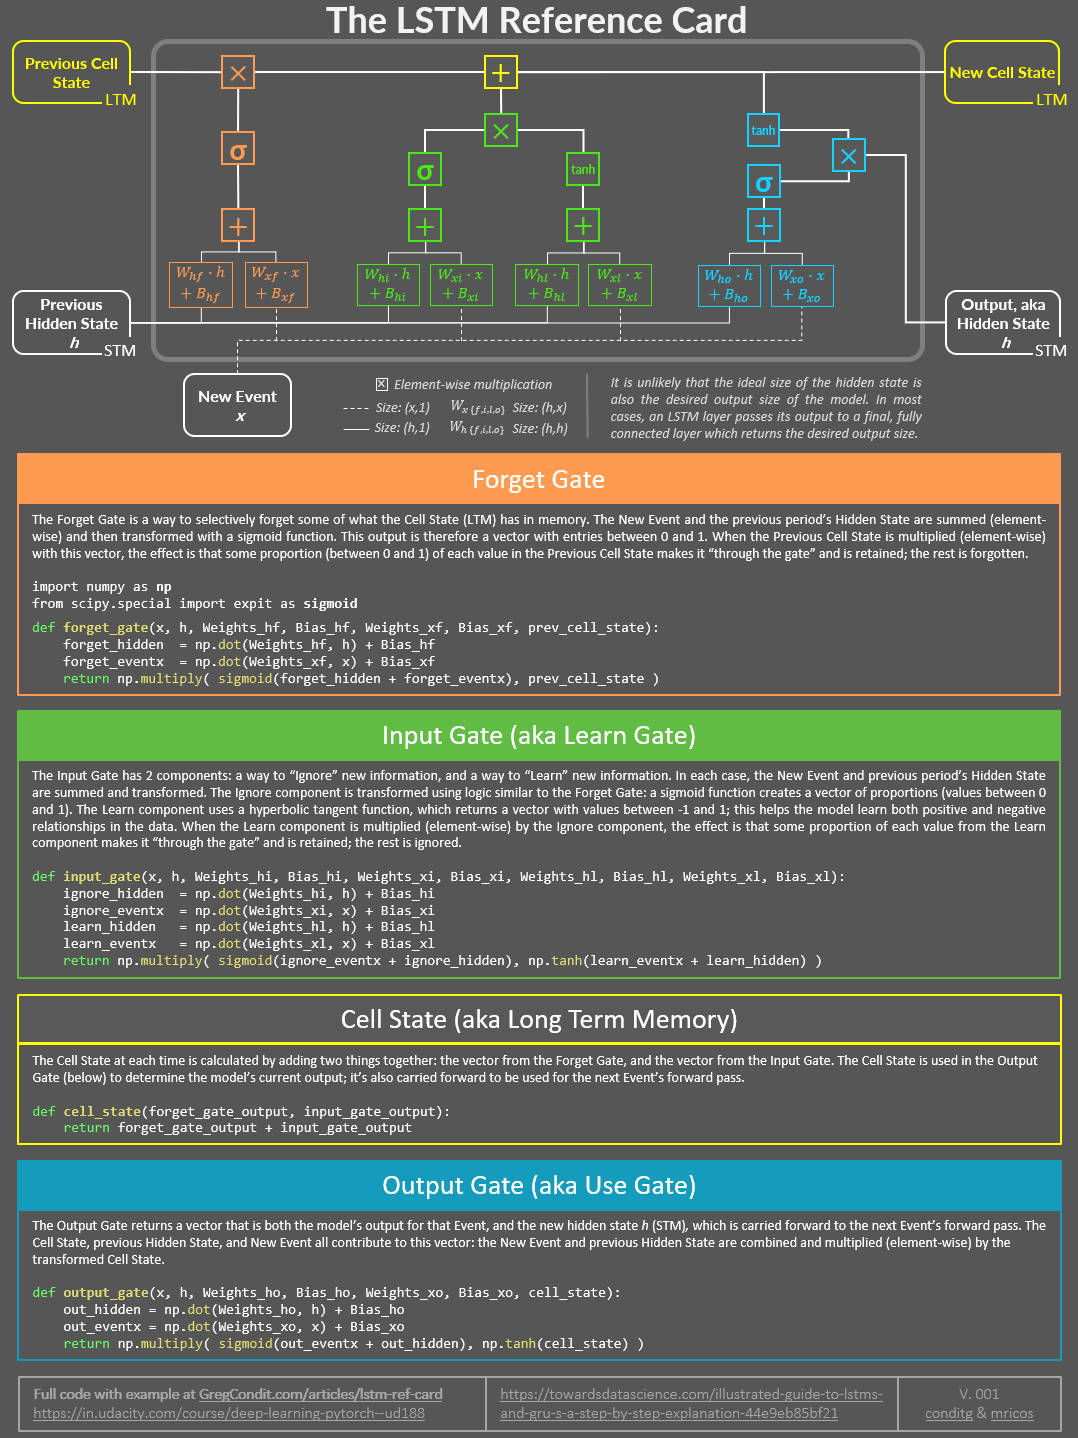

In [701]:
from PIL import Image
import requests
from io import BytesIO
url="https://miro.medium.com/max/1078/1*1OCrRYMjrlI4J061RD5bqQ.png"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
display(img)

How LSTMs work - First, inputs and previous hidden states are passed into the forget gate, where it is multiplied with weights and bias and then passed through a Sigmoid function 

This output is then multiplied with the previous layer cell state to form a value - forget gate output

inputs and previous hidden states are then passed through the input gate, where they're multiplied with input gate weights and added bias, this is then made to pass through a sigmoid function as well as a TanH function, parallelly

These two outputs are then multiplied to gate the Input gate output.

Similarly for output gate, the inputs and hidden states are multiplied by weights, with bias added from the output gate as shown

- This is then passed through a sigmoid activation layer

- Outputs from the cell state are also passed through a Tanh function

- The results from above are multiplied to get the new hidden state

- The cell state from Input gate is also passed to make the new cell state




### KEY POINTERS

LSTM shape >> [Input size], Hidden size , number of layers of LSTM

When passing input, it needs to be of the shape Sequence, Batch, [Input size]

Hidden State and Cell state both need to be of the format number of layers, Batch , Hidden size

In [706]:
## EXAMPLE

rnn = nn.LSTM(1, 3, 1)
#input1 = np.array([[[1,10,11,15,9,100],[2,11,12,16,9,100]]], dtype=np.float32)
input1=torch.randn(1,1,1)
input1=torch.tensor(input1)
print(input1.shape)
h0 = torch.randn(1, 1, 3)
c0 = torch.randn(1, 1, 3)
print(c0.dtype)
output, (hn, cn) = rnn(input1, (h0, c0))

C:\Users\akaniyamparambil\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


torch.Size([1, 1, 1])
torch.float32


In [660]:
input1

tensor([[[0.3225]]])

In [657]:
output.shape

torch.Size([1, 1, 3])

In [658]:
(hn.shape, cn.shape)

(torch.Size([1, 1, 3]), torch.Size([1, 1, 3]))

In [659]:
for c in rnn.parameters():
    print(c.shape)

torch.Size([12, 1])
torch.Size([12, 3])
torch.Size([12])
torch.Size([12])


In [702]:
for c in rnn.named_parameters():
    print(c)
    
    # weight_ih_l0 is actually the combined weights of all the gates i.e [4*number of hidden states, input size] >> [12,1] in this case

('weight_ih_l0', Parameter containing:
tensor([[-0.3362],
        [ 0.5151],
        [-0.0321],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.2387],
        [ 0.3276],
        [-0.1778],
        [-0.3967],
        [ 0.4130],
        [ 0.4804]], requires_grad=True))
('weight_hh_l0', Parameter containing:
tensor([[ 0.2665,  0.2123, -0.3010],
        [ 0.1275,  0.4863,  0.4862],
        [-0.4479, -0.0443,  0.2221],
        [-0.5427, -0.0777, -0.0609],
        [-0.3612,  0.1139,  0.5713],
        [-0.2960, -0.1849,  0.3095],
        [-0.1035,  0.4653, -0.4983],
        [ 0.5636,  0.0923,  0.2687],
        [-0.2956,  0.1564, -0.1417],
        [ 0.1539,  0.1444,  0.0647],
        [ 0.0382,  0.5432,  0.2147],
        [ 0.0573, -0.4232,  0.5254]], requires_grad=True))
('bias_ih_l0', Parameter containing:
tensor([-0.4678,  0.1060,  0.3826, -0.4981,  0.3333, -0.0187,  0.1718,  0.2326,
         0.2751,  0.2121, -0.4040, -0.1212], requires_grad=True))
('bias_hh_l0', Paramete

In [671]:
Input_weights = rnn.weight_ih_l0.detach().numpy()
Input_bias = rnn.bias_ih_l0.detach().numpy()
Hidden_weights = rnn.weight_hh_l0.detach().numpy()
Hidden_bias = rnn.bias_hh_l0.detach().numpy()

In [704]:
rnn.weight_ih_l0

Parameter containing:
tensor([[-0.3362],
        [ 0.5151],
        [-0.0321],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.2387],
        [ 0.3276],
        [-0.1778],
        [-0.3967],
        [ 0.4130],
        [ 0.4804]], requires_grad=True)

In [703]:
rnn.weight_ih_l0.data[:3] # By using the following method we can target out the data in every specific gate 
                          # as the parameter weight_ih_l0 would give you a combination of all weights


tensor([[-0.3362],
        [ 0.5151],
        [-0.0321]])

### EXAMPLE PYTORCH USING EMBEDDINGS

In [923]:
vocab=["This is unnatural of anyone to think this is strange, but is weird"]

In [924]:
vocab1=["Flower power"]

In [925]:
vocab2=["We re unnatural and stupid"]

In [926]:
vocab3=["This is stupendously ingregious"]

In [355]:
Vocab_master="""Good evening, London. Allow me first to apologize for this interruption. I do, like many of you, appreciate the comforts of every day routine - the security of the familiar, the tranquility of repetition. I enjoy them as much as any bloke. But in the spirit of commemoration, thereby those important events of the past usually associated with someone's death or the end of some awful bloody struggle, a celebration of a nice holiday, I thought we could mark this November the 5th, a day that is sadly no longer remembered, by taking some time out of our daily lives to sit down and have a little chat.

There are of course those who do not want us to speak. I suspect even now, orders are being shouted into telephones, and men with guns will soon be on their way. Why? Because while the truncheon may be used in lieu of conversation, words will always retain their power. Words offer the means to meaning, and for those who will listen, the enunciation of truth. And the truth is, there is something terribly wrong with this country, isn't there?

Cruelty and injustice, intolerance and oppression. And where once you had the freedom to object, to think and speak as you saw fit, you now have censors and systems of surveillance coercing your conformity and soliciting your submission. How did this happen? Who's to blame? Well certainly there are those who are more responsible than others, and they will be held accountable, but again truth be told, if you're looking for the guilty, you need only look into a mirror.

I know why you did it. I know you were afraid. Who wouldn't be? War, terror, disease. There were a myriad of problems which conspired to corrupt your reason and rob you of your common sense. Fear got the best of you, and in your panic you turned to the now high chancellor, Adam Sutler. He promised you order, he promised you peace, and all he demanded in return was your silent, obedient consent. Last night, I sought to end that silence. Last night, I destroyed the Old Bailey, to remind this country of what it has forgotten. More than four hundred years ago, a great citizen wished to embed the 5th of November forever in our memory. His hope was to remind the world that fairness, justice, and freedom are more than words - they are perspectives. So if you've seen nothing, if the crimes of this government remain unknown to you, then I would suggest you allow the 5th of November to pass unmarked.

But if you see what I see, if you feel as I feel, and if you would seek as I seek, then I ask you to stand beside me one year from tonight, outside the gates of Parliament, and together we shall give them a 5th of November that shall never, ever be forgot.

"""



In [356]:
Vocab_master

"Good evening, London. Allow me first to apologize for this interruption. I do, like many of you, appreciate the comforts of every day routine - the security of the familiar, the tranquility of repetition. I enjoy them as much as any bloke. But in the spirit of commemoration, thereby those important events of the past usually associated with someone's death or the end of some awful bloody struggle, a celebration of a nice holiday, I thought we could mark this November the 5th, a day that is sadly no longer remembered, by taking some time out of our daily lives to sit down and have a little chat.\n\nThere are of course those who do not want us to speak. I suspect even now, orders are being shouted into telephones, and men with guns will soon be on their way. Why? Because while the truncheon may be used in lieu of conversation, words will always retain their power. Words offer the means to meaning, and for those who will listen, the enunciation of truth. And the truth is, there is someth

In [1294]:
Vocab_master="""What is Data Science The Data Science platform is a dynamically stable environment, given we have a set of methodologies in place to make sure that the maintenance is key #
What is Data Scientist A Data Scientist is a person who is capable of interfacing between some business data and a pattern, he works by identifying the pattern and coming up with methods to hone insights out of data#
Architect A Data Architect is someone who architects the data in an enterprise, implementing data warehouse solutions for streamlined transfer of data#
"""

In [1295]:
Vocab_master=Vocab_master.lower()

In [1296]:
# totals=""
# for x in Vocab_master:
#     totals=totals+" " +x

In [1297]:
# totals

In [1298]:
vocab_size=len(Vocab_master)

In [1299]:
words=Vocab_master.split()

In [1300]:
from collections import Counter

In [1301]:
for x,y in Counter(Vocab_master.split()).most_common():
    print(x,y)

data 8
is 7
a 6
the 4
of 4
what 2
science 2
in 2
to 2
scientist 2
who 2
and 2
data# 2
architect 2
platform 1
dynamically 1
stable 1
environment, 1
given 1
we 1
have 1
set 1
methodologies 1
place 1
make 1
sure 1
that 1
maintenance 1
key 1
# 1
person 1
capable 1
interfacing 1
between 1
some 1
business 1
pattern, 1
he 1
works 1
by 1
identifying 1
pattern 1
coming 1
up 1
with 1
methods 1
hone 1
insights 1
out 1
someone 1
architects 1
an 1
enterprise, 1
implementing 1
warehouse 1
solutions 1
for 1
streamlined 1
transfer 1


In [1302]:
dict={}
for x,i in enumerate(list(set(Vocab_master.split()))):
     dict[i]=x

In [1303]:
dict

{'streamlined': 0,
 'interfacing': 1,
 'for': 2,
 'given': 3,
 'works': 4,
 'architects': 5,
 'sure': 6,
 'set': 7,
 'data': 8,
 'architect': 9,
 'platform': 10,
 'pattern,': 11,
 'identifying': 12,
 'with': 13,
 'methods': 14,
 'stable': 15,
 '#': 16,
 'an': 17,
 'solutions': 18,
 'implementing': 19,
 'business': 20,
 'we': 21,
 'place': 22,
 'to': 23,
 'who': 24,
 'the': 25,
 'dynamically': 26,
 'have': 27,
 'environment,': 28,
 'science': 29,
 'pattern': 30,
 'make': 31,
 'warehouse': 32,
 'maintenance': 33,
 'and': 34,
 'transfer': 35,
 'he': 36,
 'is': 37,
 'key': 38,
 'enterprise,': 39,
 'that': 40,
 'of': 41,
 'coming': 42,
 'person': 43,
 'capable': 44,
 'insights': 45,
 'what': 46,
 'someone': 47,
 'a': 48,
 'between': 49,
 'some': 50,
 'hone': 51,
 'up': 52,
 'methodologies': 53,
 'in': 54,
 'data#': 55,
 'scientist': 56,
 'by': 57,
 'out': 58}

In [1304]:
vocab_size=len(dict.keys())
vocab_size

59

In [1305]:
for y in dict.items():
    print(y)

('streamlined', 0)
('interfacing', 1)
('for', 2)
('given', 3)
('works', 4)
('architects', 5)
('sure', 6)
('set', 7)
('data', 8)
('architect', 9)
('platform', 10)
('pattern,', 11)
('identifying', 12)
('with', 13)
('methods', 14)
('stable', 15)
('#', 16)
('an', 17)
('solutions', 18)
('implementing', 19)
('business', 20)
('we', 21)
('place', 22)
('to', 23)
('who', 24)
('the', 25)
('dynamically', 26)
('have', 27)
('environment,', 28)
('science', 29)
('pattern', 30)
('make', 31)
('warehouse', 32)
('maintenance', 33)
('and', 34)
('transfer', 35)
('he', 36)
('is', 37)
('key', 38)
('enterprise,', 39)
('that', 40)
('of', 41)
('coming', 42)
('person', 43)
('capable', 44)
('insights', 45)
('what', 46)
('someone', 47)
('a', 48)
('between', 49)
('some', 50)
('hone', 51)
('up', 52)
('methodologies', 53)
('in', 54)
('data#', 55)
('scientist', 56)
('by', 57)
('out', 58)


In [1306]:

Encoded=([y[1] for x in Vocab_master.split() for y in dict.items() if x==y[0] ])
    

In [1307]:
Encoded

[46,
 37,
 8,
 29,
 25,
 8,
 29,
 10,
 37,
 48,
 26,
 15,
 28,
 3,
 21,
 27,
 48,
 7,
 41,
 53,
 54,
 22,
 23,
 31,
 6,
 40,
 25,
 33,
 37,
 38,
 16,
 46,
 37,
 8,
 56,
 48,
 8,
 56,
 37,
 48,
 43,
 24,
 37,
 44,
 41,
 1,
 49,
 50,
 20,
 8,
 34,
 48,
 11,
 36,
 4,
 57,
 12,
 25,
 30,
 34,
 42,
 52,
 13,
 14,
 23,
 51,
 45,
 58,
 41,
 55,
 9,
 48,
 8,
 9,
 37,
 47,
 24,
 5,
 25,
 8,
 54,
 17,
 39,
 19,
 8,
 32,
 18,
 2,
 0,
 35,
 41,
 55]

In [1308]:
#Padding sentences

In [1309]:
# for x in Encoded:
#     x.extend([0]*(13-len(x)))

## Creating batches

In [1312]:
Train_x=[]
label_y=[]
def batch_maker():
    n=4
    k=0
    for term in range(len(Encoded)):
        
        Train_x.append(Encoded[k:n])
        label_y.append(Encoded[n:n+1])
        n=n+1
        k=k+1

batch_maker()

## Padding sequences

In [1313]:
for t in range(len(Train_x)):
    if len(Train_x[t])<4:
        print(Train_x[t])
        s=5-len(Train_x[t])
        Train_x[t].extend([0]*s)
        print(Train_x[t])
            
            

[35, 41, 55]
[35, 41, 55, 0, 0]
[41, 55]
[41, 55, 0, 0, 0]
[55]
[55, 0, 0, 0, 0]


## Getting rid of missing data points

In [1314]:
label_y=label_y[:-4]
Train_x=Train_x[:-4]

In [1315]:
Train_x[-1],Train_x[-2],Train_x[-3]


([2, 0, 35, 41], [18, 2, 0, 35], [32, 18, 2, 0])

In [1316]:
Train_x[0], label_y[0],Train_x[1], label_y[1]

([46, 37, 8, 29], [25], [37, 8, 29, 25], [8])

In [1317]:
a1=[1,2,3]
a1.extend([0]*2)

In [1318]:
a1

[1, 2, 3, 0, 0]

In [1319]:
label_y

[[25],
 [8],
 [29],
 [10],
 [37],
 [48],
 [26],
 [15],
 [28],
 [3],
 [21],
 [27],
 [48],
 [7],
 [41],
 [53],
 [54],
 [22],
 [23],
 [31],
 [6],
 [40],
 [25],
 [33],
 [37],
 [38],
 [16],
 [46],
 [37],
 [8],
 [56],
 [48],
 [8],
 [56],
 [37],
 [48],
 [43],
 [24],
 [37],
 [44],
 [41],
 [1],
 [49],
 [50],
 [20],
 [8],
 [34],
 [48],
 [11],
 [36],
 [4],
 [57],
 [12],
 [25],
 [30],
 [34],
 [42],
 [52],
 [13],
 [14],
 [23],
 [51],
 [45],
 [58],
 [41],
 [55],
 [9],
 [48],
 [8],
 [9],
 [37],
 [47],
 [24],
 [5],
 [25],
 [8],
 [54],
 [17],
 [39],
 [19],
 [8],
 [32],
 [18],
 [2],
 [0],
 [35],
 [41],
 [55]]

In [1320]:
from torch.utils.data import DataLoader

In [1321]:
# Train=DataLoader(Encoded,batch_size=5)

In [1322]:
# label=[]
# # for x in Train:
#     print(x)
#     label.append(x[0].detach().numpy().tolist())

In [1335]:
# label=label[1:]
# label=torch.tensor(label, dtype=float)
# label
Train_x[-1],label_y[-1]

([2, 0, 35, 41], [55])

In [1324]:
#vocab_size= len(Encoded)
vocab_size

59

In [330]:
class Pytorchisawesome(nn.Module):
    def __init__(self):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, 50)
        self.lstm = nn.LSTM(50,60,1,bidirectional=True)
        self.L1=nn.Linear(120,vocab_size)
        self.hidden = (torch.randn(2,2,60),torch.randn(2,2,60))
        #self.L2= nn.Linear(293,293)
        
    def forward(self,x):
        x=self.embed(x)
        #print(x.shape)
        #print(x.view(5,5,-1))
        #print(x.view(1,5,-1))
        #print(self.hidden.shape)
        output, hidden = self.lstm(x.view(2,2,-1), self.hidden)
        #print(output.shape)
        #print(f"Printing output of LSTM layer {output.shape}")
        final = self.L1(output.view(len(x),-1))
        #print(f"Printing shape of Final layer before softmax {final.shape}")
        log_probs = F.log_softmax(final, dim=1)
        
        #print(f"Printing log probability {log_probs[-1]}")
        #print(log_probs.shape)
        #rel=self.L2(log_probs.view(5,-1))
        #print(f"Printing REL {rel}")
        return log_probs[-1]
        
        
        
        




In [332]:
#model=Pytorchisawesome()

In [1467]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [1468]:
model

Pytorchisawesome(
  (embed): Embedding(59, 50)
  (lstm): LSTM(50, 60, bidirectional=True)
  (L1): Linear(in_features=120, out_features=59, bias=True)
)

In [1469]:
# for x in Train_x:
#     print(torch.FloatTensor(x))
#     break
len(Train_x),len(label_y)

(88, 88)

In [1470]:
vocab_size

59

In [1471]:
# s1=[1,2,3]
# sum(s1)

In [1473]:

epochs=500
losses=[]
for num in range(epochs):
    print(sum(losses)/vocab_size)
    losses=[]
    k =0
    for x in Train_x:
        x=torch.tensor(x)
        #print(x)
        model.zero_grad()

        result=model(x)
        #result=result.detach()

        y_actual=torch.tensor(label_y[k], dtype=torch.long)
        #result=torch.argmax(result[0])
        #print(result)
        #new=torch.max(result)

        #new=torch.tensor(new)
        #print(f"Index is {new}")
        result=result
        #print(f"Printing result shape {result.view(1,-1).shape}")
        #print(f"Printing actual shape {y_actual.shape}")
        #print("Printing the actual results down")
        #new_new=[1 if i ==new else 0 for i in range(vocab_size) ]
        #print(new_new)
        #print(result,y_actual)
        #modified=torch.argmax(result.view(1,-1))
        
        #modified=modified.float()
        #print(modified,y_actual)
        #print(modified.shape,y_actual.shape)
        loss=loss_function(result.view(1,-1),y_actual)
        k=k+1
        loss.backward()
        optimizer.step()
        #print(loss)
        #break
        losses.append(loss)



0.0
tensor(5.3545, grad_fn=<DivBackward0>)
tensor(5.3487, grad_fn=<DivBackward0>)
tensor(5.3430, grad_fn=<DivBackward0>)
tensor(5.3373, grad_fn=<DivBackward0>)
tensor(5.3315, grad_fn=<DivBackward0>)
tensor(5.3257, grad_fn=<DivBackward0>)
tensor(5.3199, grad_fn=<DivBackward0>)
tensor(5.3140, grad_fn=<DivBackward0>)
tensor(5.3082, grad_fn=<DivBackward0>)
tensor(5.3023, grad_fn=<DivBackward0>)
tensor(5.2964, grad_fn=<DivBackward0>)
tensor(5.2904, grad_fn=<DivBackward0>)
tensor(5.2845, grad_fn=<DivBackward0>)
tensor(5.2785, grad_fn=<DivBackward0>)
tensor(5.2724, grad_fn=<DivBackward0>)
tensor(5.2664, grad_fn=<DivBackward0>)
tensor(5.2603, grad_fn=<DivBackward0>)
tensor(5.2542, grad_fn=<DivBackward0>)
tensor(5.2480, grad_fn=<DivBackward0>)
tensor(5.2418, grad_fn=<DivBackward0>)
tensor(5.2356, grad_fn=<DivBackward0>)
tensor(5.2294, grad_fn=<DivBackward0>)
tensor(5.2231, grad_fn=<DivBackward0>)
tensor(5.2167, grad_fn=<DivBackward0>)
tensor(5.2104, grad_fn=<DivBackward0>)
tensor(5.2040, grad_f

tensor(1.0367, grad_fn=<DivBackward0>)
tensor(1.0316, grad_fn=<DivBackward0>)
tensor(1.0265, grad_fn=<DivBackward0>)
tensor(1.0214, grad_fn=<DivBackward0>)
tensor(1.0164, grad_fn=<DivBackward0>)
tensor(1.0114, grad_fn=<DivBackward0>)
tensor(1.0064, grad_fn=<DivBackward0>)
tensor(1.0015, grad_fn=<DivBackward0>)
tensor(0.9966, grad_fn=<DivBackward0>)
tensor(0.9917, grad_fn=<DivBackward0>)
tensor(0.9869, grad_fn=<DivBackward0>)
tensor(0.9821, grad_fn=<DivBackward0>)
tensor(0.9773, grad_fn=<DivBackward0>)
tensor(0.9726, grad_fn=<DivBackward0>)
tensor(0.9679, grad_fn=<DivBackward0>)
tensor(0.9633, grad_fn=<DivBackward0>)
tensor(0.9586, grad_fn=<DivBackward0>)
tensor(0.9540, grad_fn=<DivBackward0>)
tensor(0.9495, grad_fn=<DivBackward0>)
tensor(0.9450, grad_fn=<DivBackward0>)
tensor(0.9405, grad_fn=<DivBackward0>)
tensor(0.9360, grad_fn=<DivBackward0>)
tensor(0.9316, grad_fn=<DivBackward0>)
tensor(0.9271, grad_fn=<DivBackward0>)
tensor(0.9228, grad_fn=<DivBackward0>)
tensor(0.9184, grad_fn=<D

In [915]:
pwd

'C:\\Users\\akaniyamparambil'

In [1129]:
Train_x[0]

[203, 221]

In [1130]:
blah=nn.Embedding(10, 3)

In [1133]:
blah(torch.tensor([1,2]).long())

tensor([[ 0.1685,  1.1358,  0.4762],
        [ 1.4778, -0.7600,  1.1954]], grad_fn=<EmbeddingBackward>)

In [919]:
torch.save(model,"LSTMISNOTSOAWESOME.pt")

C:\Users\akaniyamparambil\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\serialization.py:256: UserWarning: Couldn't retrieve source code for container of type Pytorchisawesome. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [335]:
model=torch.load("LSTMISNOTSOAWESOME.pt") 

# Incase of error loading a model, what you can do is just initialise the model class and then load it 
# - Some Namespace error is observed

In [922]:
to_predict=torch.tensor(Train_x[7])
validation = torch.tensor(label_y[7])
model.eval()
z=model(to_predict)

val = torch.argmax(z)
print(val,validation)
print("Actual")
print(list(dict.keys())[list(dict.values()).index(validation)])
print("Predicted")
print(list(dict.keys())[list(dict.values()).index(val)])

tensor(171) tensor([171])
Actual
do,
Predicted
do,


In [1344]:
def convert_to_ids(Sentence):
    return ([y[1] for x in Sentence.split() for y in dict.items() if x==y[0] ])
def predictions_away(to_predict):
    z=model(to_predict)
    val = torch.argmax(z)
    return list(dict.keys())[list(dict.values()).index(val)]

In [1345]:
def checker(Sentence):
    
    fill=Sentence.split()
    flag=0
    missing=[]
    for z1 in fill:
        if z1 in dict.keys():
            flag=flag+1
            if flag==4:
                radical(Sentence)
            
            
            
        
        else:
            missing.append(z1)
            print("Some text passed is not in the trained corpus. Provide another sentence")
        
    if missing != list():
        print(f"The missing texts are {missing}")

In [901]:
"shall" in dict.keys()

True

In [1346]:
model.eval()

Pytorchisawesome(
  (embed): Embedding(59, 50)
  (lstm): LSTM(50, 60, num_layers=2)
  (L1): Linear(in_features=60, out_features=59, bias=True)
)

In [1347]:
def radical(Sentence):
    Converted = convert_to_ids(Sentence)
    Converted=torch.tensor(Converted)
    print(Converted)
    outputme=predictions_away(Converted)
    print(outputme)

Hi, how are you >> 1 Hi, I am well, thank you. 
                   2 I am well
                   3 Well
                   4 Good
                   5 Not too bad
                   6 Nothing much

LSTM and Standard classification 

Standard classification >> X="Hi, how are you"

Y = "Hi, I am well, thank you"



In [1253]:
Sen="What do you mean by data science"
Sen=Sen.lower()
need=Sen.split()
listing=[]
for x in range(len(need)-1):
    listing.append([need[x],need[x+1]])
    
listing    

[['what', 'do'],
 ['do', 'you'],
 ['you', 'mean'],
 ['mean', 'by'],
 ['by', 'data'],
 ['data', 'science']]

In [1282]:
for count in listing:
    actual_sentence=" ".join(count)
    try:
        #model.eval()
        print(actual_sentence)
        classical(actual_sentence)
    except:   
        pass
        
    
    


what do
The sentence is what do
do you
The sentence is do you
you mean
The sentence is you mean
mean by
The sentence is mean by
by data
The sentence is by data
Required : ['by']
Required : ['by', 'data']
Required : ['by', 'data', 'enterprise,']
Required : ['by', 'data', 'enterprise,', 'enterprise,']
Required : ['by', 'data', 'enterprise,', 'enterprise,', 'enterprise,']
Required : ['by', 'data', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,']
Required : ['by', 'data', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,']
Required : ['by', 'data', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,']
Required : ['by', 'data', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,']
Required : ['by', 'data', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,']
Required : ['by', 'data', 'enterprise,', 'enterp

Required : ['by', 'data', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,']
Required : ['by', 'data', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'en

Required : ['by', 'data', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,']
Required : ['by', 'data', 'en

Required : ['by', 'data', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,',

Required : ['by', 'data', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,',

Required : ['data', 'science', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,']
Required : ['data', 'science', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,']
Required : ['data', 'science', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,']
Required : ['data', 'science', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,']
Required : ['data', 'science', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'ente

Required : ['data', 'science', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,']
Required : ['data', 'science', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterpr

Required : ['data', 'science', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,']
Required 

Required : ['data', 'science', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterpri

Required : ['data', 'science', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterprise,', 'enterpri

In [1348]:
def classical(Sentence):
    Sentence=Sentence
    print(f"The sentence is {Sentence}")
    lister=[]
    for r in range(100):
        a1=convert_to_ids(Sentence)
        a1=torch.tensor(a1)
        a2=predictions_away(a1)
        a2
        a3,regard=confuse(Sentence)
        lister.append(regard)
        #print(a3)
        Sentence=a3
        #print(f"Required : {lister}")
    outputme=" ".join(lister) + " " + Sentence
    print(outputme)

In [1349]:

classical("what is data science")

The sentence is what is data science
what is data science someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone someone


In [1474]:
# HERE IS WHERE THE MAGIC HAPPENS

# What is Data Science?

Sentence="what is data architect"
checker(Sentence)

tensor([46, 37,  8,  9])
a


In [1475]:
Sentence

'what is data architect'

In [1476]:
#Sentence="Scientist Data"
lister=[]
for r in range(20):
    a1=convert_to_ids(Sentence)
    a1=torch.tensor(a1)
    a2=predictions_away(a1)
    #print(a2)
    a3,regard=confuse(Sentence)
    lister.append(regard)
    #print(a3)
    Sentence=a3
outputme=" ".join(lister) + " " + Sentence
print(outputme)

what is data architect a data architect is a data and a data scientist is a person who is capable of data# architect a


What is the intolerance and cruelty? >> intolerance, [context]

In [1363]:
Vocab_master

'what is data science the data science platform is a dynamically stable environment, given we have a set of methodologies in place to make sure that the maintenance is key #\nwhat is data scientist a data scientist is a person who is capable of interfacing between some business data and a pattern, he works by identifying the pattern and coming up with methods to hone insights out of data#\narchitect a data architect is someone who architects the data in an enterprise, implementing data warehouse solutions for streamlined transfer of data#\n'

In [979]:
def confuse(sent):
    new= sent.split()
    blah=new[0]
    new=" ".join(new[1:]) + " " +a2
    #print(new[0:1])
    return (new,blah)

In [294]:
m = nn.LogSoftmax(dim=1)
loss = nn.NLLLoss()
# input is of size N x C = 3 x 5
input = torch.randn(3, 5, requires_grad=True)
# each element in target has to have 0 <= value < C
target = torch.tensor([1, 0, 4])
output = loss(m(input), target)
output.backward()

In [302]:
input.shape, target.shape

(torch.Size([3, 5]), torch.Size([3]))

C:\Users\akaniyamparambil\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


tensor([[-2.8463, -3.3021, -1.0577, -2.4230, -0.7567],
        [-1.2796, -1.2537, -3.0649, -2.1514, -1.2967],
        [-1.4198, -1.9520, -2.9156, -1.8000, -0.9244]],
       grad_fn=<LogSoftmaxBackward>)

In [864]:
#out=torch.randn(1,4)
#out=out.view(1,-1)
out=torch.tensor([2]).view(1,-1)
print(out)
print(out.shape,target.shape)
target=torch.tensor([3])

tensor([[2]])
torch.Size([1, 1]) torch.Size([1])


In [865]:
F.cross_entropy(out, target)

RuntimeError: "log_softmax_lastdim_kernel_impl" not implemented for 'Long'

In [728]:
target

tensor([260])

In [329]:
CONTEXT_SIZE = 2
EMBEDDING_DIM = 10
# We will use Shakespeare Sonnet 2
test_sentence = """When forty winters shall besiege thy brow,
And dig deep trenches in thy beauty's field,
Thy youth's proud livery so gazed on now,
Will be a totter'd weed of small worth held:
Then being asked, where all thy beauty lies,
Where all the treasure of thy lusty days;
To say, within thine own deep sunken eyes,
Were an all-eating shame, and thriftless praise.
How much more praise deserv'd thy beauty's use,
If thou couldst answer 'This fair child of mine
Shall sum my count, and make my old excuse,'
Proving his beauty by succession thine!
This were to be new made when thou art old,
And see thy blood warm when thou feel'st it cold.""".split()
# we should tokenize the input, but we will ignore that for now
# build a list of tuples.  Each tuple is ([ word_i-2, word_i-1 ], target word)
trigrams = [([test_sentence[i], test_sentence[i + 1]], test_sentence[i + 2])
            for i in range(len(test_sentence) - 2)]
# print the first 3, just so you can see what they look like
print(trigrams[:3])

vocab = set(test_sentence)
word_to_ix = {word: i for i, word in enumerate(vocab)}

[(['When', 'forty'], 'winters'), (['forty', 'winters'], 'shall'), (['winters', 'shall'], 'besiege')]


In [330]:
for context, target in trigrams:

        # Step 1. Prepare the inputs to be passed to the model (i.e, turn the words
        # into integer indices and wrap them in tensors)
        context_idxs = torch.tensor([word_to_ix[w] for w in context], dtype=torch.long)
        print(context_idxs)

tensor([77, 70])
tensor([70, 84])
tensor([84, 33])
tensor([33,  2])
tensor([ 2, 41])
tensor([41, 55])
tensor([55, 10])
tensor([10,  1])
tensor([ 1, 14])
tensor([14, 71])
tensor([71, 21])
tensor([21, 41])
tensor([41, 54])
tensor([54, 35])
tensor([35, 96])
tensor([96, 29])
tensor([29, 95])
tensor([95, 72])
tensor([72, 48])
tensor([48, 16])
tensor([16, 85])
tensor([85, 69])
tensor([69, 45])
tensor([45,  5])
tensor([ 5, 46])
tensor([46,  8])
tensor([ 8, 92])
tensor([92, 67])
tensor([67, 68])
tensor([68, 62])
tensor([62, 15])
tensor([15, 31])
tensor([31, 36])
tensor([36, 59])
tensor([59, 23])
tensor([23, 88])
tensor([88, 41])
tensor([41, 43])
tensor([43, 25])
tensor([25, 18])
tensor([18, 88])
tensor([88, 13])
tensor([13, 27])
tensor([27, 67])
tensor([67, 41])
tensor([41, 89])
tensor([89, 60])
tensor([60, 38])
tensor([38, 30])
tensor([30, 50])
tensor([50, 90])
tensor([90, 63])
tensor([63, 14])
tensor([14, 53])
tensor([53, 93])
tensor([93, 11])
tensor([11, 61])
tensor([61, 80])
tensor([80, 17

In [332]:
vocab_size, embedding_dim = len(vocab),10
embeds = nn.Embedding(vocab_size, embedding_dim)

In [335]:
embeds(context_idxs[0]).shape

torch.Size([10])

In [514]:
def prepare_sequence(seq, to_ix):
    idxs = [to_ix[w] for w in seq]
    return torch.tensor(idxs, dtype=torch.long)


training_data = [
    ("The dog ate the apple".split(), ["DET", "NN", "V", "DET", "NN"]),
    ("Everybody read that book".split(), ["NN", "V", "DET", "NN"])
]
word_to_ix = {}
for sent, tags in training_data:
    for word in sent:
        if word not in word_to_ix:
            word_to_ix[word] = len(word_to_ix)
print(word_to_ix)
tag_to_ix = {"DET": 0, "NN": 1, "V": 2}

# These will usually be more like 32 or 64 dimensional.
# We will keep them small, so we can see how the weights change as we train.
EMBEDDING_DIM = 6
HIDDEN_DIM = 6

{'The': 0, 'dog': 1, 'ate': 2, 'the': 3, 'apple': 4, 'Everybody': 5, 'read': 6, 'that': 7, 'book': 8}


In [515]:
class LSTMTagger(nn.Module):

    def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size):
        super(LSTMTagger, self).__init__()
        self.hidden_dim = hidden_dim

        self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)

        # The LSTM takes word embeddings as inputs, and outputs hidden states
        # with dimensionality hidden_dim.
        self.lstm = nn.LSTM(embedding_dim, hidden_dim)

        # The linear layer that maps from hidden state space to tag space
        self.hidden2tag = nn.Linear(hidden_dim, tagset_size)

    def forward(self, sentence):
        embeds = self.word_embeddings(sentence)
        print(embeds.shape)
        print(embeds.view(len(sentence), 1, -1).shape)
        lstm_out, _ = self.lstm(embeds.view(len(sentence), 1, -1))
        tag_space = self.hidden2tag(lstm_out.view(len(sentence), -1))
        tag_scores = F.log_softmax(tag_space, dim=1)
        return tag_scores

In [516]:
model = LSTMTagger(EMBEDDING_DIM, HIDDEN_DIM, len(word_to_ix), len(tag_to_ix))
loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [519]:
for sentence, tags in training_data:
        # Step 1. Remember that Pytorch accumulates gradients.
        # We need to clear them out before each instance
        model.zero_grad()

        # Step 2. Get our inputs ready for the network, that is, turn them into
        # Tensors of word indices.
        sentence_in = prepare_sequence(sentence, word_to_ix)
        targets =torch.tensor([1])
        print(f"Input sentence {sentence_in}")

        # Step 3. Run our forward pass.
        tag_scores = model(sentence_in)
        #print(tag_scores)
        print(f"Targets are {targets}")
        loss = loss_function(tag_scores, targets)
        loss.backward()
        optimizer.step()

Input sentence tensor([0, 1, 2, 3, 4])
torch.Size([5, 6])
torch.Size([5, 1, 6])
Targets are tensor([1])


ValueError: Expected input batch_size (5) to match target batch_size (1).

In [245]:
a=[[1,2,3],[1,1,3],[1,4,3]]

In [246]:
a=np.array(a)

In [251]:
a

array([[1, 2, 3],
       [1, 1, 3],
       [1, 4, 3]])

In [252]:
a.T

array([[1, 1, 1],
       [2, 1, 4],
       [3, 3, 3]])

In [247]:
a.shape

(3, 3)

In [248]:
np.dot(a.T,a)

array([[ 3,  7,  9],
       [ 7, 21, 21],
       [ 9, 21, 27]])

In [249]:
np.dot(a,a.T)

array([[14, 12, 18],
       [12, 11, 14],
       [18, 14, 26]])

In [256]:
a

array([[1, 2, 3],
       [1, 1, 3],
       [1, 4, 3]])

In [260]:
a*[2,2,2]

array([[2, 4, 6],
       [2, 2, 6],
       [2, 8, 6]])